In [25]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 6.0 MB/s eta 0:00:01


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import datasets
import numpy as np
import pandas as pd
import os

In [2]:
test_df = pd.read_csv("optdigits.tes", header =None)
train_df = pd.read_csv("optdigits.tra", header =None)

In [3]:
train_df.shape

(3823, 65)

In [4]:
test_df.shape

(1797, 65)

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1797 non-null   int64
 1   1       1797 non-null   int64
 2   2       1797 non-null   int64
 3   3       1797 non-null   int64
 4   4       1797 non-null   int64
 5   5       1797 non-null   int64
 6   6       1797 non-null   int64
 7   7       1797 non-null   int64
 8   8       1797 non-null   int64
 9   9       1797 non-null   int64
 10  10      1797 non-null   int64
 11  11      1797 non-null   int64
 12  12      1797 non-null   int64
 13  13      1797 non-null   int64
 14  14      1797 non-null   int64
 15  15      1797 non-null   int64
 16  16      1797 non-null   int64
 17  17      1797 non-null   int64
 18  18      1797 non-null   int64
 19  19      1797 non-null   int64
 20  20      1797 non-null   int64
 21  21      1797 non-null   int64
 22  22      1797 non-null   int64
 23  23      1797 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3823 non-null   int64
 1   1       3823 non-null   int64
 2   2       3823 non-null   int64
 3   3       3823 non-null   int64
 4   4       3823 non-null   int64
 5   5       3823 non-null   int64
 6   6       3823 non-null   int64
 7   7       3823 non-null   int64
 8   8       3823 non-null   int64
 9   9       3823 non-null   int64
 10  10      3823 non-null   int64
 11  11      3823 non-null   int64
 12  12      3823 non-null   int64
 13  13      3823 non-null   int64
 14  14      3823 non-null   int64
 15  15      3823 non-null   int64
 16  16      3823 non-null   int64
 17  17      3823 non-null   int64
 18  18      3823 non-null   int64
 19  19      3823 non-null   int64
 20  20      3823 non-null   int64
 21  21      3823 non-null   int64
 22  22      3823 non-null   int64
 23  23      3823 

In [7]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
60,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
61,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
62,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
63,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


In [8]:

train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
0,3823.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,3823.0,0.301334,0.866986,0.0,0.0,0.0,0.0,8.0
2,3823.0,5.481821,4.631601,0.0,1.0,5.0,9.0,16.0
3,3823.0,11.805912,4.259811,0.0,10.0,13.0,15.0,16.0
4,3823.0,11.451478,4.537556,0.0,9.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
60,3823.0,11.461156,4.991934,0.0,9.0,13.0,16.0,16.0
61,3823.0,6.700497,5.775815,0.0,0.0,6.0,12.0,16.0
62,3823.0,2.105676,4.028266,0.0,0.0,0.0,2.0,16.0
63,3823.0,0.202197,1.150694,0.0,0.0,0.0,0.0,16.0


In [9]:
train_df[64].value_counts().to_frame()

,64
1,389
3,389
4,387
7,387
9,382
2,380
8,380
6,377
0,376
5,376


In [10]:
train_df[64].value_counts().to_frame().reset_index()

,index,64
0,1,389
1,3,389
2,4,387
3,7,387
4,9,382
5,2,380
6,8,380
7,6,377
8,0,376
9,5,376


In [11]:
train_df[64].value_counts().to_frame().reset_index().sort_values('index')

,index,64
8,0,376
0,1,389
5,2,380
1,3,389
2,4,387
9,5,376
7,6,377
3,7,387
6,8,380
4,9,382


In [12]:
X= train_df

In [13]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [14]:
y = test_df

In [15]:
X_test = test_df.loc[:,0:63]
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
1793,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
1795,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [16]:
y_test = test_df.loc[:,64]
y_test

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: 64, Length: 1797, dtype: int64

In [17]:
y_train = train_df.loc[:,64]
y_train

0       0
1       0
2       7
3       4
4       6
       ..
3818    9
3819    4
3820    6
3821    6
3822    7
Name: 64, Length: 3823, dtype: int64

In [29]:
X_train =train_df.loc[:, 0: 63]
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,10,0,0,0,8,13,15,10,1,0
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,0,4,9,0,0,0
3820,0,0,3,15,0,0,0,0,0,0,...,4,0,0,0,4,14,16,9,0,0
3821,0,0,6,16,2,0,0,0,0,0,...,15,0,0,0,5,16,16,16,5,0


In [30]:
rf =RandomForestClassifier( n_jobs = -1, random_state = 0)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [32]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
conf_mat

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 180,   0,   0,   0,   0,   0,   0,   0,   2],
       [  1,   1, 175,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 174,   0,   1,   0,   3,   3,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1, 176,   2,   0,   1,   2],
       [  2,   1,   0,   0,   0,   0, 176,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 168,   1,  10],
       [  0,   5,   1,   0,   0,   0,   0,   0, 166,   2],
       [  0,   0,   0,   6,   0,   1,   0,   0,   2, 171]])

In [34]:

chiffres  = [0,1,2,3,4,5,6,7,8,9]
chiffres 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
pd.DataFrame (metrics.confusion_matrix(y_test,y_pred), columns =chiffres )

,0,1,2,3,4,5,6,7,8,9
0,177,0,0,0,1,0,0,0,0,0
1,0,180,0,0,0,0,0,0,0,2
2,1,1,175,0,0,0,0,0,0,0
3,2,0,0,174,0,1,0,3,3,0
4,0,0,0,0,181,0,0,0,0,0
5,0,0,0,0,1,176,2,0,1,2
6,2,1,0,0,0,0,176,0,2,0
7,0,0,0,0,0,0,0,168,1,10
8,0,5,1,0,0,0,0,0,166,2
9,0,0,0,6,0,1,0,0,2,171


In [36]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [37]:
chiffres_df  = [0,1,2,3,4,5,6,7,8,9]
chiffres_df

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<Figure size 7200x7200 with 0 Axes>

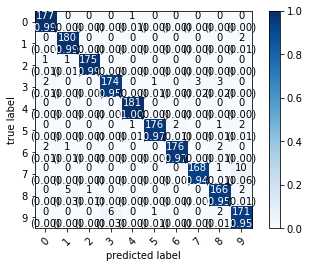

In [44]:
plt.figure(figsize=(100, 100))
fig, ax = plot_confusion_matrix(conf_mat = conf_mat, show_absolute=True, show_normed=True, colorbar=True, class_names = chiffres,)
plt.show()

In [45]:
1-metrics.accuracy_score(y_test, y_pred)

0.029493600445186452

In [46]:
1-rf.score(X_test, y_test)

0.029493600445186452

In [47]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
print(n_estimators)

[  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  77  82  87
  92  97 102 107 112 117 122 127 132 137 142 147 153 158 163 168 173 178
 183 188 193 198 203 208 213 218 223 229 234 239 244 249 254 259 264 269
 274 279 284 289 294 300]


In [48]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [49]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [50]:
errors = []
err_default = 0.029
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth = max_depth, n_jobs=-1,random_state=0)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err - err_default}%\n\n')



Results : max_depth = 1 => err_test = 29.494

Improvement of 29.465%




Results : max_depth = 2 => err_test = 19.978

Improvement of 19.949%




Results : max_depth = 3 => err_test = 13.3

Improvement of 13.271%




Results : max_depth = 4 => err_test = 9.683

Improvement of 9.654%




Results : max_depth = 5 => err_test = 7.401

Improvement of 7.372%




Results : max_depth = 6 => err_test = 5.954

Improvement of 5.925%




Results : max_depth = 7 => err_test = 5.12

Improvement of 5.091%




Results : max_depth = 8 => err_test = 4.007

Improvement of 3.9779999999999998%




Results : max_depth = 9 => err_test = 4.007

Improvement of 3.9779999999999998%




Results : max_depth = 10 => err_test = 3.339

Improvement of 3.31%




Results : max_depth = None => err_test = 2.949

Improvement of 2.92%




Text(0.5, 0, 'max_depths')

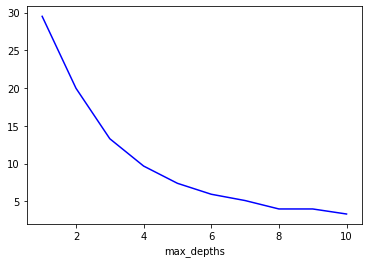

In [51]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

#####       					 Tuning n_estimators 

In [52]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
print(n_estimators)


[  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  77  82  87
  92  97 102 107 112 117 122 127 132 137 142 147 153 158 163 168 173 178
 183 188 193 198 203 208 213 218 223 229 234 239 244 249 254 259 264 269
 274 279 284 289 294 300]


In [57]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(X_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)     
    print(f"\n Results : n_estimators => {rf.n_estimators} => acc_oob = {acc_oob}, err_test => {err_test}, err_train = {err_train}\n")


 Results : n_estimators = 1 => acc_oob = 36.777,err_test = 20.59,err_train = 6.278


 Results : n_estimators = 6 => acc_oob = 81.637,err_test = 8.013,err_train = 0.183


 Results : n_estimators = 11 => acc_oob = 90.4,err_test = 4.841,err_train = 0.0



/Users/daniels/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/daniels/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/daniels/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/daniels/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/daniels/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some 


 Results : n_estimators = 16 => acc_oob = 93.905,err_test = 4.341,err_train = 0.026


 Results : n_estimators = 21 => acc_oob = 95.239,err_test = 4.118,err_train = 0.0


 Results : n_estimators = 26 => acc_oob = 95.946,err_test = 4.174,err_train = 0.026


 Results : n_estimators = 31 => acc_oob = 96.73,err_test = 3.283,err_train = 0.0


 Results : n_estimators = 36 => acc_oob = 96.887,err_test = 3.283,err_train = 0.0


 Results : n_estimators = 41 => acc_oob = 96.495,err_test = 3.45,err_train = 0.0


 Results : n_estimators = 46 => acc_oob = 97.07,err_test = 3.339,err_train = 0.0


 Results : n_estimators = 51 => acc_oob = 97.646,err_test = 3.506,err_train = 0.0


 Results : n_estimators = 56 => acc_oob = 97.672,err_test = 3.617,err_train = 0.0


 Results : n_estimators = 61 => acc_oob = 97.489,err_test = 2.949,err_train = 0.0


 Results : n_estimators = 66 => acc_oob = 97.75,err_test = 3.061,err_train = 0.0


 Results : n_estimators = 71 => acc_oob = 98.012,err_test = 3.116,err_train

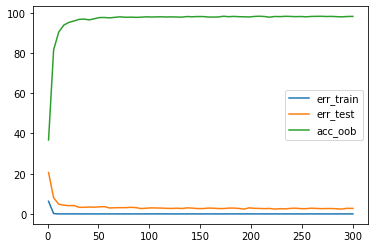

In [59]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [60]:
param = {"max_features" : [2, 4, 1]}
param

{'max_features': [2, 4, 1]}

In [61]:
param = {"max_features" : [2, 4, 1]}
from sklearn.model_selection import GridSearchCV
rf = GridSearchCV(RandomForestClassifier(n_estimators=300, random_state = 0),param, cv=5, n_jobs = -1)

In [62]:
rfOpt = rf.fit(X_train, y_train)

In [64]:
print("Best score = %f, Best parameter = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Best score = 0.021187, Best parameter = {'max_features': 4}


In [65]:
1-rfOpt.score(X_test,y_test)

0.024485253199777457

In [66]:
print('Accuracy of RF classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.98
